### Relationship between Rasterio datasets and NumPy n-dimensional arrays

In [10]:
import rasterio
satdat = rasterio.open("20190321_174348_0f1a_3B_AnalyticMS.tif")

In [16]:
blue,green,red,nir = satdat.read()

In [17]:
print(type(blue))

<class 'numpy.ndarray'>


In [18]:
blue.shape

(4213, 8341)

In [19]:
# Output a min & max pixel value in each band.
for band in [blue, green, red, nir]:
    print("min {min} max {max}".format(min=band.min(), max=band.max()))

min 0 max 30256
min 0 max 20671
min 0 max 27564
min 0 max 33932


In [20]:
import math

# Let's grab the pixel 10km east and 10km south of the upper left corner

# World coordinates for the desired pixel.
x_coord = satdat.bounds.left + 10000
y_coord = satdat.bounds.top - 10000

# Convert world coordinates to pixel.  World coordinates may not transform precisely to row and column indexes,
# but a Numpy array can only be indexed by integer values.  The 'op' parameter for 'satdat.index()' determines
# how the transformed values are rounded.  In some cases any point falling within a pixel should be considered
# contained, and in other cases only points falling within one portion of the pixels hould be considered contained.
# The 'op' parameter lets users make this decision on their own.  The values must still be cast to integers.
col, row = satdat.index(x_coord, y_coord, op=math.floor)
col = int(col)
row = int(row)


# Now let's look at the value of each band at this pixel
print("Red: {}".format(red[row, col]))
print("Green: {}".format(green[row, col]))
print("Blue: {}".format(blue[row, col]))
print("NIR: {}".format(nir[row, col]))

Red: 2771
Green: 3974
Blue: 4603
NIR: 1008


### Visualize Data

In [21]:
from matplotlib import pyplot as plt
image_file = "clipped.tif"
satdat = rasterio.open(image_file)

In [22]:
def scale(band):
    return band / 10000.0

# Load the bands into numpy arrays
# recall that we previously learned PlanetScope band order is BGRN
blue = scale(satdat.read(1))
green = scale(satdat.read(2))
red = scale(satdat.read(3))
nir = scale(satdat.read(4))

In [23]:
import numpy
rgb = numpy.dstack((red, green, blue))
nrg = numpy.dstack((nir, red, green))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


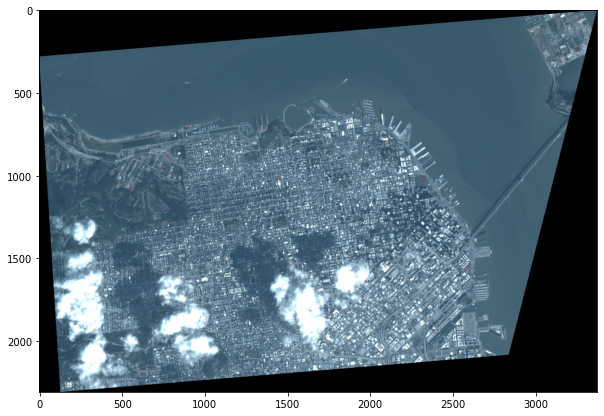

In [29]:
plt.figure(figsize=(10,10))
fig = plt.imshow(rgb)
# Display the results.
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


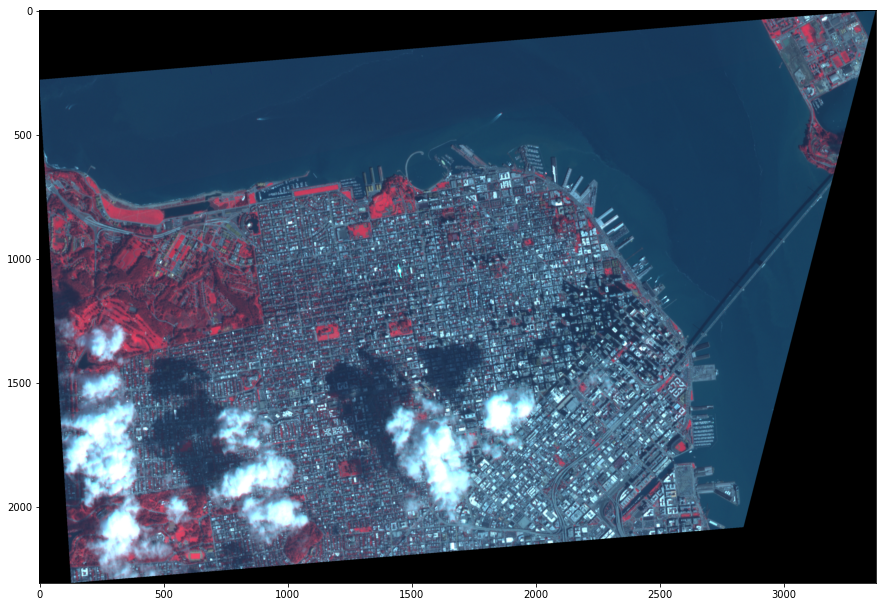

In [30]:
plt.figure(figsize=(15,15))
fig = plt.imshow(nrg)
plt.show()
# nrg is useed to show the vegetation 

### Using matplotlib to plot a histogram of pixel values

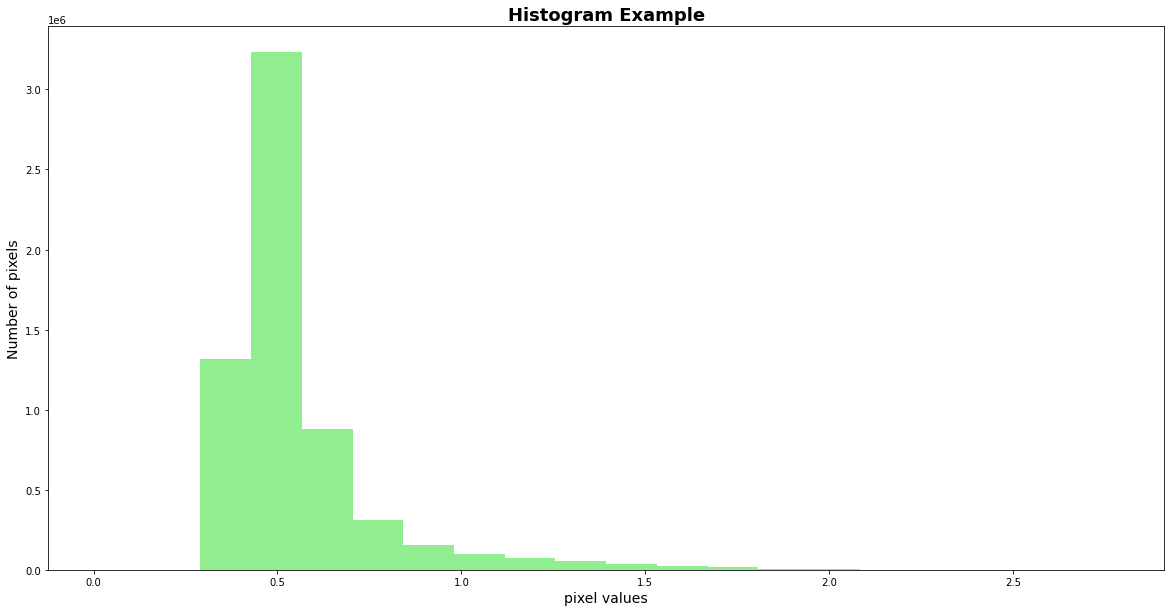

In [31]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_subplot(111)
plt.title("Histogram Example", fontsize=18, fontweight='bold')
plt.xlabel("pixel values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)
x = blue[numpy.not_equal(blue, satdat.nodata)]
bins = 20
color = 'lightgreen'
ax.hist(x,bins,color=color)
fig2.savefig("histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.7)
plt.show()